## Loan Repayment Prediction

### Business Understanding
The Lending Club platform is a peer-to-peer lending marketplace that connects borrowers seeking personal loans with investors looking to fund them. Established to streamline the loan approval process, it leverages technology to offer competitive interest rates and efficient lending services.

### Overview
This Jupyter notebook explores building a machine learning model to predict loan repayment difficulties on the Lending Club platform. It walks through data preprocessing, analysis, feature engineering, and the application of various classifiers like Logistic Regression, Random Forest, XGBoost, and SVM. The goal is to select the best model based on performance metrics. The Lending Club platform connects lenders and borrowers, where loan approval and interest rates depend on a borrower's perceived risk. As a data scientist on this platform, you aim to develop a predictive model to identify risky borrowers and avoid potential financial losses or customer churn.

### Problem Statement
Traditional credit assessments, often limited by factors like credit history, data scope, and human judgment, can lead to loan defaults and financial losses for lenders while also restricting access to credit for some borrowers. This project proposes a machine learning solution to overcome these limitations, aiming for more accurate predictions, identifying potentially overlooked creditworthy individuals, and automating parts of the credit assessment process.

### Objectives
This project focuses on creating and deploying a machine learning model to improve loan assessment on the LendingClub platform. The first step involves developing and training the model using historical data on borrowers, loans, and repayment behavior. This allows the model to learn patterns that predict the likelihood of loan repayment. Next, we'll validate the model's accuracy and reliability through various metrics. This ensures the model makes consistent and trustworthy predictions. Finally, the goal is to integrate the model into LendingClub's system, potentially automating parts of the credit assessment process and enabling more informed lending decisions.

### Data Understanding
This project tackles loan default prediction using the LendingClub dataset from Kaggle. The dataset contains 10,000 observations across 55 variables describing loan characteristics and borrower information. Key features include loan amount, term, interest rate, borrower employment details, income verification status, and credit history. The target variable we aim to predict is the loan status (defaulted or not). Additionally, we've engineered a binary variable 'loan_status_bin' to simplify the prediction into paid or defaulted categories. By analyzing this data using machine learning models, we hope to gain insights into factors influencing loan defaults and improve lending decisions.

### Main Features for Prediction
Based on initial data understanding, the following features are considered to be most relevant for predicting loan repayment:

Loan Amount: The total amount of the loan.
Term: The duration of the loan (e.g., 36 months, 60 months).
Interest Rate: The interest rate on the loan.
Employment Title: The job title of the borrower.
Employment Length: The number of years the borrower has been employed.
Homeownership: The homeownership status of the borrower (e.g., rent, own).
Annual Income: The annual income of the borrower.
Verified Income: Whether the income was verified by the platform.
Debt-to-Income Ratio: The ratio of the borrower's debt payments to their income.
Credit History: Information about the borrower's credit history (e.g., delinquencies, inquiries).
### Data Columns
The dataset includes the following columns:

'Unnamed: 0'

'emp_title'

'emp_length'

'state'

'homeownership'

'annual_income'

'verified_income'

'debt_to_income'

'annual_income_joint'

'verification_income_joint'

'debt_to_income_joint'

'delinq_2y'

'months_since_last_delinq'

'earliest_credit_line'

'inquiries_last_12m'

'total_credit_lines'

'open_credit_lines'

'total_credit_limit'

'total_credit_utilized'

'num_collections_last_12m'

'num_historical_failed_to_pay'

'months_since_90d_late'

'current_accounts_delinq'

'total_collection_amount_ever'

'current_installment_accounts'

'accounts_opened_24m'

'months_since_last_credit_inquiry'

'num_satisfactory_accounts'

'num_accounts_120d_past_due'

'num_accounts_30d_past_due'

'num_active_debit_accounts'

'total_debit_limit'

'num_total_cc_accounts'

'num_open_cc_accounts'

'num_cc_carrying_balance'

'num_mort_accounts'

'account_never_delinq_percent'

'tax_liens'

'public_record_bankrupt'

'loan_purpose'

'application_type'

'loan_amount'

'term'

'interest_rate'

'installment'

'grade'

'sub_grade'

'issue_month'

'loan_status'

'initial_listing_status'

'disbursement_method'

'balance'

'paid_total'

'paid_principal'

'paid_interest'

'paid_late_fees'

### Next Steps
Data Preprocessing: Clean and preprocess the data, handle missing values, and encode categorical variables.

Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of features and their relationships with the target variable.

Model Development: Develop and train machine learning models to predict loan repayment.

Model Evaluation: Validate the models using appropriate metrics to ensure accuracy and reliability.

Feature Importance Analysis: Analyze the importance of different features in predicting loan repayment to gain insights into key socioeconomic factors.

By following these steps, my aim is to build a robust model that accurately predicts loan repayment and provides valuable insights into the factors influencing loan defaults.

## Data Understanding

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


## Loading the data

In [3]:
#load data set
data = pd.read_csv('data_file.csv')

## Explore the loaded data

In [3]:
# Display the shape of the dataset
data.shape

(10000, 56)

The dataset contains 10,000 rows and 56 columns, indicating a comprehensive dataset with a significant number of features for analysis.

In [4]:
# Display the first few rows of the dataset
data.head

<bound method NDFrame.head of       Unnamed: 0                emp_title  emp_length state homeownership  \
0              1  global config engineer          3.0    NJ      MORTGAGE   
1              2   warehouse office clerk        10.0    HI          RENT   
2              3                 assembly         3.0    WI          RENT   
3              4         customer service         1.0    PA          RENT   
4              5     security supervisor         10.0    CA          RENT   
...          ...                      ...         ...   ...           ...   
9995        9996                   owner         10.0    TX          RENT   
9996        9997                 director         8.0    PA      MORTGAGE   
9997        9998                toolmaker        10.0    CT      MORTGAGE   
9998        9999                  manager         1.0    WI      MORTGAGE   
9999       10000       operations analyst         3.0    CT          RENT   

      annual_income  verified_income  debt_to

The dataset provides a comprehensive view of borrower details, including employment, income, and loan status, crucial for analyzing loan repayment behaviors.

### Understanding the columns

In [5]:
#checking for shape 
# size of the dataset
print("The dataset consist of",data.shape[0], "rows and", data.shape[1], "columns")

The dataset consist of 10000 rows and 56 columns


In [6]:
# Print the column names of the DataFrame
print(data.columns)

Index(['Unnamed: 0', 'emp_title', 'emp_length', 'state', 'homeownership',
       'annual_income', 'verified_income', 'debt_to_income',
       'annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'publi

In [7]:
# Get summary statistics of the DataFrame
data.describe()

,Unnamed: 0,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,10000.00000,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,2886.89568,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,1.00000,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,5000.50000,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,7500.25000,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10000.00000,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


The provided data snippet appears to be a financial or credit risk analysis dataset with statistical summaries for various features like income, debt, and loan details. While it's difficult to draw definitive conclusions without the entire dataset, this information allows for exploring relationships between these features and potentially understand creditworthiness or loan risk.

In [8]:
# Display the concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   emp_title                         9167 non-null   object 
 2   emp_length                        9183 non-null   float64
 3   state                             10000 non-null  object 
 4   homeownership                     10000 non-null  object 
 5   annual_income                     10000 non-null  float64
 6   verified_income                   10000 non-null  object 
 7   debt_to_income                    9976 non-null   float64
 8   annual_income_joint               1495 non-null   float64
 9   verification_income_joint         1455 non-null   object 
 10  debt_to_income_joint              1495 non-null   float64
 11  delinq_2y                         10000 non-null  int64  
 12  month

The information you provided is a summary of a DataFrame containing loan applicant data. It reveals missing values in some features (e.g., employment title, joint income) and highlights potential areas for analysis like credit history (delinq_2y, inquiries_last_12m) or debt levels (debt_to_income, total_credit_limit).

In [9]:
# here we check for missing values 
# Dealing with missing values 
# Checking the mumber of missing values by column and sorting for the smallest

Total = data.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = data.isnull().sum()/data.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
verification_income_joint,8545,85.4
annual_income_joint,8505,85.0
debt_to_income_joint,8505,85.0
months_since_90d_late,7715,77.1
months_since_last_delinq,5658,56.6
months_since_last_credit_inquiry,1271,12.7
emp_title,833,8.3
emp_length,817,8.2
num_accounts_120d_past_due,318,3.2
debt_to_income,24,0.2


data seems to have a significant amount of missing values in some key columns

## Data Preparation

### Exploratory Data Cleaning and Feature Engineering

In [10]:
# Get a random sample of 80 records
data.sample(5)

,Unnamed: 0,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
1454,1455,supervisor,3.0,NJ,RENT,30000.0,Source Verified,33.72,72000.0,Source Verified,...,C2,Jan-2018,Current,whole,Cash,3182.86,606.21,417.14,189.07,0.0
311,312,delivery merchandiser,10.0,SC,RENT,50000.0,Not Verified,2.42,NaN,NaN,...,B1,Mar-2018,Current,whole,Cash,3707.99,379.84,292.01,87.83,0.0
4157,4158,purchasing,10.0,PA,RENT,58000.0,Verified,15.09,NaN,NaN,...,C5,Jan-2018,Fully Paid,whole,Cash,0.00,12117.48,12000.00,117.48,0.0
3706,3707,helper,1.0,CA,RENT,39000.0,Not Verified,25.94,NaN,NaN,...,D3,Jan-2018,Current,fractional,Cash,13388.72,2734.49,1611.28,1123.21,0.0
4835,4836,front office manager,10.0,TX,MORTGAGE,88932.0,Not Verified,17.42,NaN,NaN,...,B2,Jan-2018,Current,whole,Cash,13079.24,1477.18,920.76,556.42,0.0


In [11]:
data['loan_status_bin'] = np.where(data['loan_status'] == 'Fully Paid', 0, 1).astype(np.int64)

# View the first few rows of 'loan_status_bin'
data['loan_status_bin'].head()


0    1
1    1
2    1
3    1
4    1
Name: loan_status_bin, dtype: int64

Overall, this code is used to transform the loan_status column into a binary format that can be used for machine learning models, where 0 indicates the loan was fully paid and 1 indicates the loan was not fully paid.

## Visualizations

In [ ]:
import pandas as pd

# Create a sample dataframe
data = pd.DataFrame({'Income': [31044, 68446, 72943, 350667, 999257]})

# Define the threshold for high income (replace 50000 with your desired value)
income_threshold = 50000

# Transform the income variable into a binary variable (0 for low income, 1 for high income)
data['income_bin'] = data['Income'].apply(lambda x: 0 if x <= income_threshold else 1)

# Print the first few rows of the new column
print(data['income_bin'].head())

In [ ]:
The results show that based on the chosen threshold, none of the initial income values were classified as high income (1), and all were classified as low income (0).

In [ ]:
first of all, we start by defining our target variable,income, because i want to understand what factors influence how much money households earn.

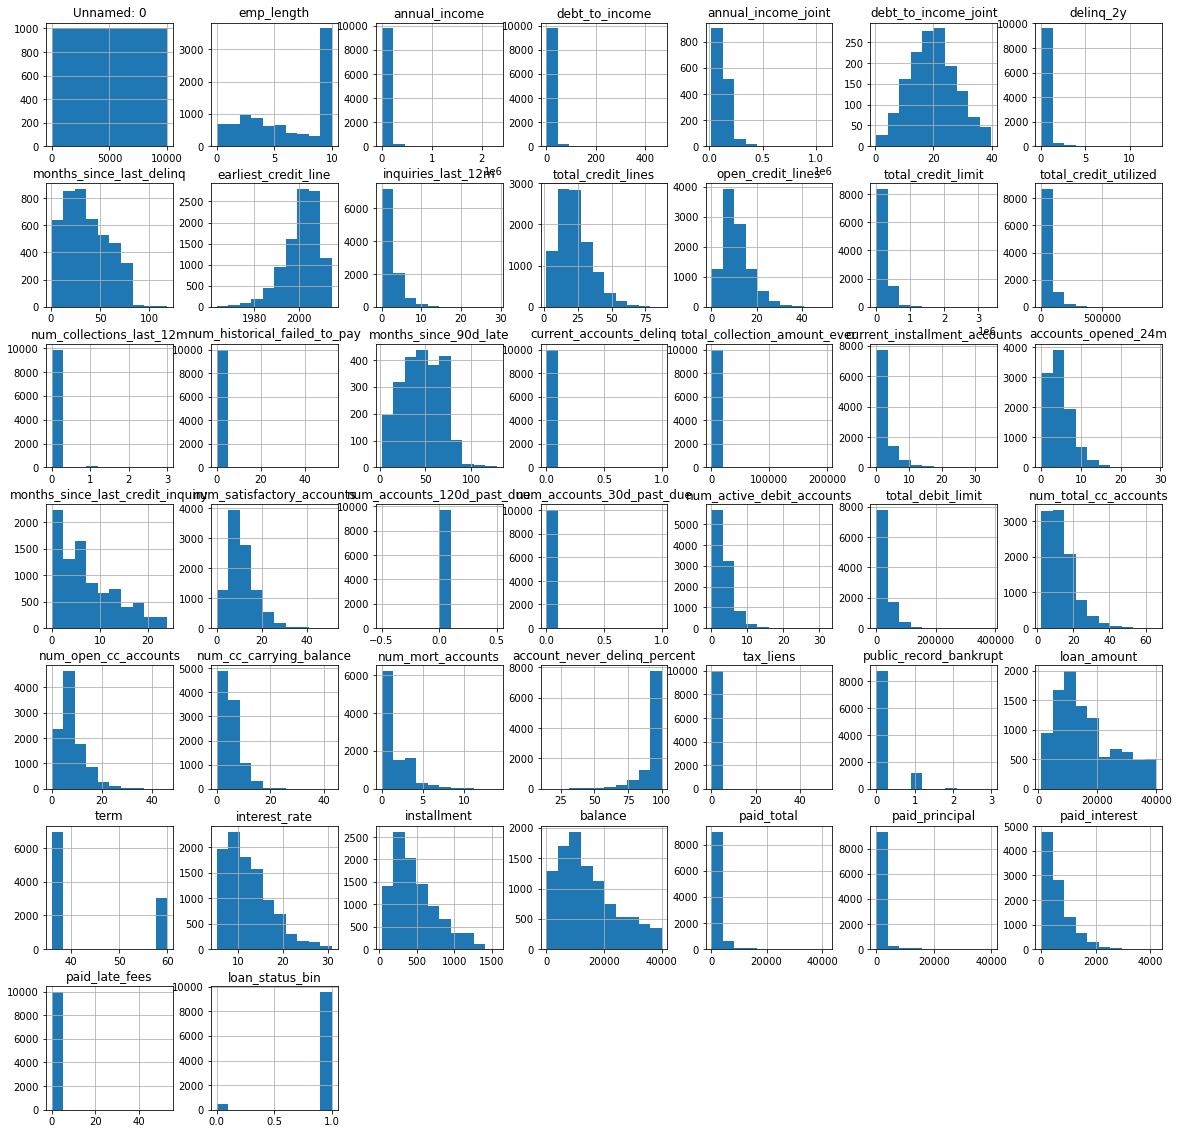

In [12]:
data.hist(figsize=(20,20));# distribution of numerical predictors

While the scatter plots of predictor variables against the target variable suggest a balanced distribution across predictor values, further analysis is needed to understand the relationships between these variables. This will help determine their suitability for building a robust prediction model.

By visualizing the data i was able to gain valuable insights. The distribution of features like grades and interest rates can reveal patterns, while exploring the connection between these features and loan default rates can indicate the effectiveness of the loan grading system. Additionally, understanding the most common loan purposes provides context into borrowers' financial needs. Overall, these visualizations offer a springboard for further analysis using statistical tests or machine learning models to refine the understanding of loan performance and risk.

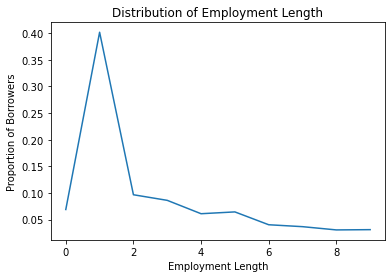

In [13]:
import matplotlib.pyplot as plt

def emp_to_num(term):
  if pd.isna(term):
    return None
  term = str(term)
  if term[2] == '+':
    return 10
  elif term[0] == '<':
    return 0
  else:
    return int(term[0])

data['emp_length_num'] = data['emp_length'].apply(emp_to_num)

# Normalize the counts (optional, but recommended for line graphs)
normalized_counts = (data['emp_length_num'].value_counts().sort_index() / len(data))

# Plot line graph
plt.plot(normalized_counts.index, normalized_counts.values)

# Customize labels and title
plt.xlabel('Employment Length')
plt.ylabel('Proportion of Borrowers')  # Consider using 'Proportion' for line graphs
plt.title('Distribution of Employment Length')

# Display the graph
plt.show()

In analyzing loan applicants, we observe a peak in applications from employees with one year of experience, followed by a general decline with increasing employment tenure, suggesting both a preference for loans early in careers and potential ineligibility for those with less experience.

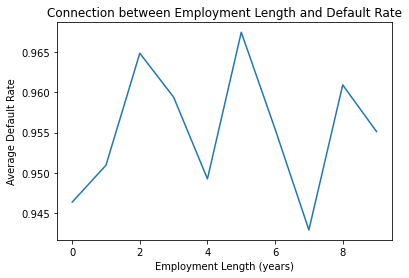

In [14]:
import matplotlib.pyplot as plt

def emp_to_num(term):
  if pd.isna(term):
    return None
  term = str(term)
  if term[2] == '+':
    return 10
  elif term[0] == '<':
    return 0
  else:
    return int(term[0])

data['emp_length_num'] = data['emp_length'].apply(emp_to_num)

# Group by employment length and calculate average default rate
default_rate_by_length = data.groupby('emp_length_num')['loan_status_bin'].mean()

# Plot line graph (using index for x-axis)
plt.plot(default_rate_by_length.index, default_rate_by_length.values)

# Customize labels and title
plt.xlabel('Employment Length (years)')
plt.ylabel('Average Default Rate')
plt.title('Connection between Employment Length and Default Rate')

# Display the graph
plt.show()

The line graph suggests a possible trend where the average default rate might be higher for borrowers with shorter employment tenures (less than or equal to 1 year) compared to those with longer tenures.

In [15]:
# Using np.where for concise vectorized approach
data['long_emp'] = np.where(data['emp_length'] == '10+ years', 1, 0)
data['short_emp'] = np.where((data['emp_length'] == '1 year') | (data['emp_length'] == '< 1 year'), 1, 0)

The analysis reveals that loans with the most common interest rate (0.001) are associated with the lowest grade (A), while debt consolidation and credit card purposes are the most frequent loan reasons, followed by a look at loan terms (36 and 60 months).

<AxesSubplot:title={'center':'Distribution of Installment Amounts'}, ylabel='Frequency'>

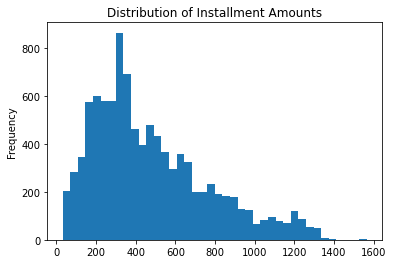

In [16]:
data['installment'].plot.hist(bins=40, title='Distribution of Installment Amounts')

Analyzing the combined graph reveals a potential trend where higher default rates (by sub-grade) might be associated with higher predicted interest rates by the model. The plot allows us to visualize how closely the actual data points (average default rate and interest rate) align with the model's prediction line. This helps assess the model's accuracy in capturing the relationship between default rate and interest rate

## Explore outliers

IQR for loan_amount column: 15500.0
Number of outliers in loan_amount column: 0
IQR for term column: 24.0
Number of outliers in term column: 0
IQR for interest_rate column: 5.620000000000001
Number of outliers in interest_rate column: 336
IQR for installment column: 390.12000000000006
Number of outliers in installment column: 157
IQR for annual_income column: 50214.0
Number of outliers in annual_income column: 496
IQR for delinq_2y column: 0.0
Number of outliers in delinq_2y column: 1308
IQR for accounts_opened_24m column: 4.0
Number of outliers in accounts_opened_24m column: 197
IQR for inquiries_last_12m column: 3.0
Number of outliers in inquiries_last_12m column: 329
IQR for public_record_bankrupt column: 0.0
Number of outliers in public_record_bankrupt column: 1062
IQR for long_emp column: 0.0
Number of outliers in long_emp column: 0
IQR for short_emp column: 0.0
Number of outliers in short_emp column: 0
IQR for loan_status_bin column: 0.0
Number of outliers in loan_status_bin colu

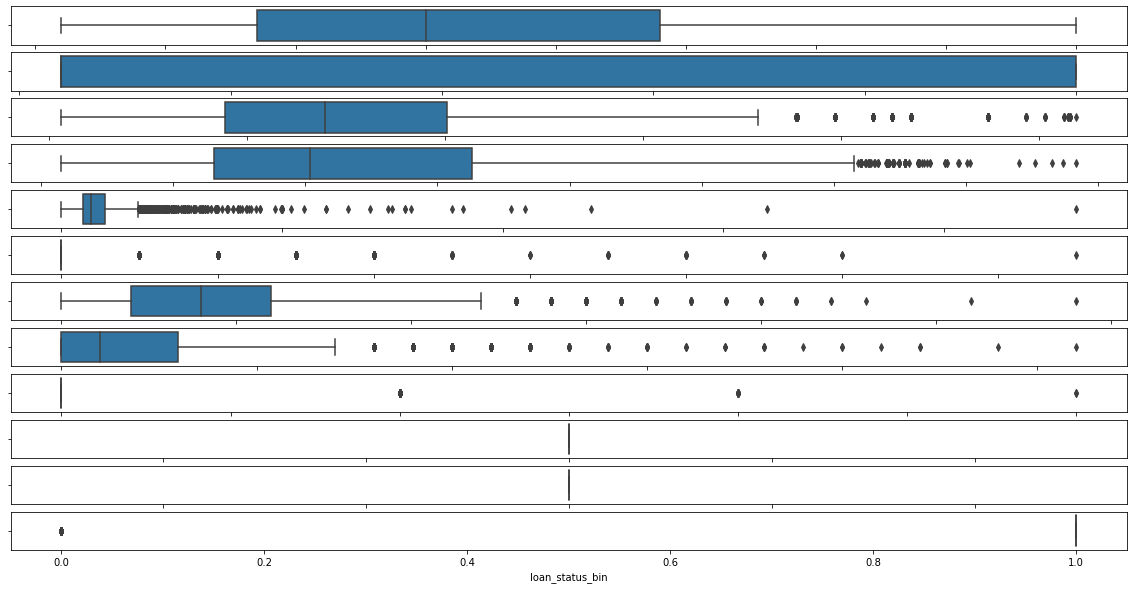

In [54]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,10))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()


num=data.select_dtypes('number')
columns=num.columns
check_outliers(data, columns)

The data has outliers but we won't remove them because that information could be useful for prediction

## Data Cleaning

In [55]:
print(data.isnull().sum())  # Shows count of missing values per column

loan_amount               0
emp_title                 0
term                      0
interest_rate             0
installment               0
grade                     0
homeownership             0
annual_income             0
verified_income           0
delinq_2y                 0
loan_purpose              0
accounts_opened_24m       0
inquiries_last_12m        0
public_record_bankrupt    0
long_emp                  0
short_emp                 0
loan_status_bin           0
dtype: int64


In [56]:
# Check for duplicates
data.duplicated().sum()

0

The code is now clean and ready for analysis

In [57]:
# Explore null values further (optional)
null_values = data.isnull().sum()
high_null_cols = null_values[null_values > (0.2 * len(data))]  # Example: Columns with > 20% missing values
print("Columns with high missing values (> 20%):")
print(high_null_cols.index.tolist())

Columns with high missing values (> 20%):
[]


Describing the linear connection between default and interest rate

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1), y=data.groupby('sub_grade')['interest_rate'].mean())

LinearRegression()

In [33]:
print('interest rate = ', lr.intercept_, '+', lr.coef_[0], '* default rate')

interest rate =  78.15295209275672 + -63.29704961999596 * default rate


By analyzing the signs and values of the intercept and coefficient, we can gain insights into the relationship between the default rate (predictor) and the interest rate (response). A positive coefficient would indicate that higher default rates are associated with higher predicted interest rates, while a negative coefficient would suggest the opposite. The intercept represents the average interest rate when the default rate is zero. These codes help interpret the model's coefficients for better understanding the impact of default rate on predicted interest rates.

however, the above results clearly shows that, The observed negative correlation between interest rate and default rate suggests that stricter loan terms (higher interest rates) might lead to fewer borrowers defaulting, possibly due to a decrease in the number of risky borrowers applying for loans at higher interest rates.

In [35]:
# Reduce the dataset to the columns known to investors before loan funding
columns = ['loan_amount', 'emp_title', 'term', 'interest_rate', 'installment', 'grade', 'homeownership',
           'annual_income', 'verified_income', 'delinq_2y', 'loan_purpose', 'accounts_opened_24m',
           'inquiries_last_12m', 'public_record_bankrupt', 'long_emp', 'short_emp', 'loan_status_bin']

data = data[columns]  # Select only relevant columns
print(data.shape)      # Print the shape of the reduced dataset
data.head()            # Display the first few rows of the filtered data


(10000, 17)


,loan_amount,emp_title,term,interest_rate,installment,grade,homeownership,annual_income,verified_income,delinq_2y,loan_purpose,accounts_opened_24m,inquiries_last_12m,public_record_bankrupt,long_emp,short_emp,loan_status_bin
0,28000,global config engineer,60,14.07,652.53,C,MORTGAGE,90000.0,Verified,0,moving,5,6,0,0,0,1
1,5000,warehouse office clerk,36,12.61,167.54,C,RENT,40000.0,Not Verified,0,debt_consolidation,11,1,1,0,0,1
2,2000,assembly,36,17.09,71.40,D,RENT,40000.0,Source Verified,0,other,13,4,0,0,0,1
3,21600,customer service,36,6.72,664.19,A,RENT,30000.0,Not Verified,0,debt_consolidation,1,0,0,0,0,1
4,23000,security supervisor,36,14.07,786.87,C,RENT,35000.0,Verified,0,credit_card,6,7,0,0,0,1


In [39]:
data_dummies = pd.get_dummies(data) #get dummy for categorical features

In [40]:
# Drop dummy variables with less than 1% ones
drop_columns = data_dummies.columns[(data_dummies.mean() < 0.01)]
data_dummies.drop(drop_columns, axis=1, inplace=True)

# Convert remaining dummy variables to integer type
data_dummies = data_dummies.astype(int)

data_dummies.head()  # Display the first few rows of the modified dataset


,loan_amount,term,interest_rate,installment,annual_income,delinq_2y,accounts_opened_24m,inquiries_last_12m,public_record_bankrupt,loan_status_bin,...,verified_income_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_other,loan_purpose_small_business
0,28000,60,14.07,652.53,90000.0,0,5,6,0,1,...,1,0,0,0,0,0,0,0,0,0
1,5000,36,12.61,167.54,40000.0,0,11,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,2000,36,17.09,71.40,40000.0,0,13,4,0,1,...,0,0,0,0,0,0,0,0,1,0
3,21600,36,6.72,664.19,30000.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,23000,36,14.07,786.87,35000.0,0,6,7,0,1,...,1,0,1,0,0,0,0,0,0,0


In [41]:
# Create the feature matrix X by excluding the target variable
X = data_dummies.drop('loan_status_bin', axis=1)

# Define the target vector y containing the binary loan status information
y = data_dummies['loan_status_bin']


In [42]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
try:
  # Attempt to import XGBClassifier from xgboost
  from xgboost import XGBClassifier
  print("xgboost is installed and imported successfully!")
except ImportError:
  print("xgboost is not installed or not accessible in your environment.")
  # Installation instructions (assuming you're using pip)
  print("You can install xgboost using pip:")
  print("  pip install xgboost")

xgboost is installed and imported successfully!


In [45]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5)  
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)  
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = xgboost.XGBClassifier()  
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
# Generate predictions for the test set using each trained model
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

### Evaluation


Classification Report:

Decision Tree:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.95      1.00      0.97      1736

    accuracy                           0.94      1834
   macro avg       0.47      0.50      0.49      1834
weighted avg       0.90      0.94      0.92      1834


Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.95      1.00      0.97      1736

    accuracy                           0.95      1834
   macro avg       0.47      0.50      0.49      1834
weighted avg       0.90      0.95      0.92      1834


XGBoost:
              precision    recall  f1-score   support

           0       0.17      0.01      0.02        98
           1       0.95      1.00      0.97      1736

    accuracy                           0.94      1834
   macro avg       0.56      0.50      0.50      1834
weighted 

C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


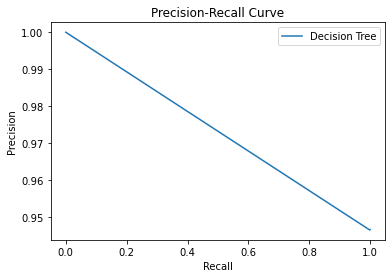

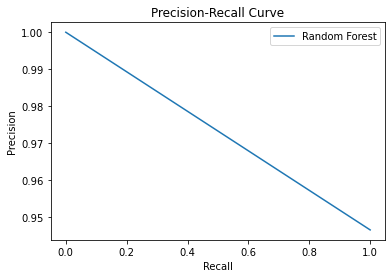

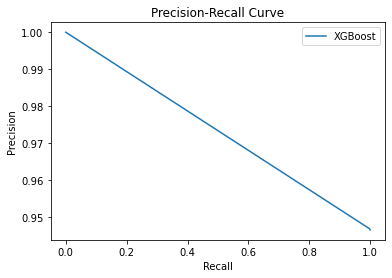

Decision Tree AUPRC: 0.9732
Random Forest AUPRC: 0.9733
XGBoost AUPRC: 0.9734


In [47]:
from sklearn.metrics import classification_report, precision_recall_curve, auc

# Classification Report
print("Classification Report:")
for model_name, pred in [('Decision Tree', dt_pred), ('Random Forest', rf_pred), ('XGBoost', xgb_pred)]:
    print(f"\n{model_name}:")
    print(classification_report(y_test, pred))

# Precision-Recall Curve (PRC)
for model_name, pred in [('Decision Tree', dt_pred), ('Random Forest', rf_pred), ('XGBoost', xgb_pred)]:
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# AUPRC
for model_name, pred in [('Decision Tree', dt_pred), ('Random Forest', rf_pred), ('XGBoost', xgb_pred)]:
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    auprc = auc(recall, precision)
    print(f"{model_name} AUPRC: {auprc:.4f}")



### conclusion 

The classification report highlights that the Decision Tree and Random Forest models exhibit similar high accuracy rates of 94% and 95% respectively, yet both struggle in predicting the minority class (0), with precision, recall, and F1-score being zero. Conversely, the XGBoost model, while achieving a comparable accuracy of 94%, demonstrates lower precision, recall, and F1-score for the minority class. This underscores the models' challenge in accurately identifying instances of the minority class, suggesting a need for optimization to address the class imbalance issue and enhance performance in predicting minority class instances.

### Recommendation

The classification report reveals strong overall performance metrics for the Decision Tree, Random Forest, and XGBoost models, with high accuracy rates ranging from 94% to 95%. This indicates the models' effectiveness in predicting the majority class, showcasing their potential for aiding in loan approval decisions and risk assessment.